In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [4]:
import pandas as pd
data = pd.read_csv('synthetic_data_ctgan.csv')
outcome = ["SYND_TB_COG_M6","SYND_TB_COG_M12","SYND_TB_COG_M36","SYND_TB_COG_M60"]
data_drop = data.drop(columns=outcome)



X_scaled = data_drop.copy()
print(X_scaled)

     GENRE        AGE  NB_AN_SCOL  IQ_CODE_J0  IQ_CODE_M6  IQ_CODE_M36  \
0      0.0  48.422889    8.101839   48.155668   47.809877    30.670447   
1      0.0  53.165332    9.231229   48.147459   48.094696    44.481254   
2      0.0  55.091005   12.308216   53.297305   50.320489    35.807191   
3      0.0  69.095067   18.162636   48.114794   49.587760    49.152721   
4      1.0  84.909150    7.901573   48.166680   48.395917    46.288776   
..     ...        ...         ...         ...         ...          ...   
495    0.0  69.347875   16.545289   48.137781   47.878977    46.699679   
496    1.0  56.074984   19.182172   50.939104   48.062841    46.065584   
497    0.0  57.186354   12.465680   48.138030   47.738347    47.122945   
498    0.0  57.282852   15.476061   47.920752   45.347181    23.176437   
499    1.0  82.662432   10.080256   48.426289   52.844609    43.470678   

     IQ_CODE_M60  PATHO_CORO  INSUF_CARD  ARTERIOPATHIE  ...  ACT_PHYS  \
0      48.313821         0.0         

c:\Users\gmrou\.conda\envs\cluster\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\gmrou\.conda\envs\cluster\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\gmrou\.conda\envs\cluster\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\gmrou\.conda\envs\cluster\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans 

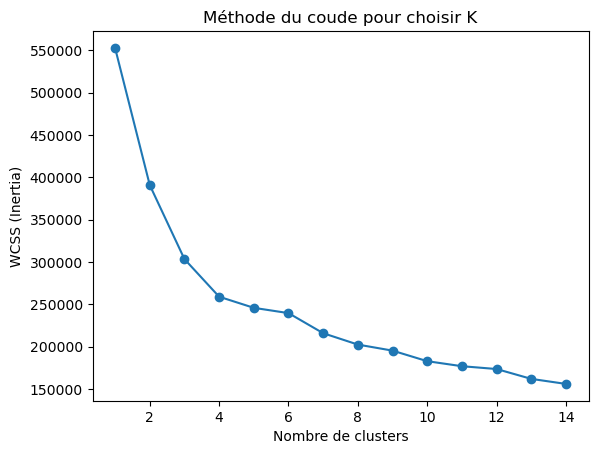

In [5]:
wcss = []  # Within-cluster sum of squares
for k in range(1, 15):  # Tester de 1 à 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Affichage du graphique du coude
plt.plot(range(1, 15), wcss, marker='o', linestyle='-')
plt.xlabel("Nombre de clusters")
plt.ylabel("WCSS (Inertia)")
plt.title("Méthode du coude pour choisir K")
plt.show()


In [6]:
from sklearn.decomposition import PCA
k_optimal = 2 # Supposons que le coude est à k=3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajout des clusters aux données
df = pd.DataFrame(data, columns=data.columns)
df["Cluster"] = clusters

# Réduction de dimension avec PCA


c:\Users\gmrou\.conda\envs\cluster\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


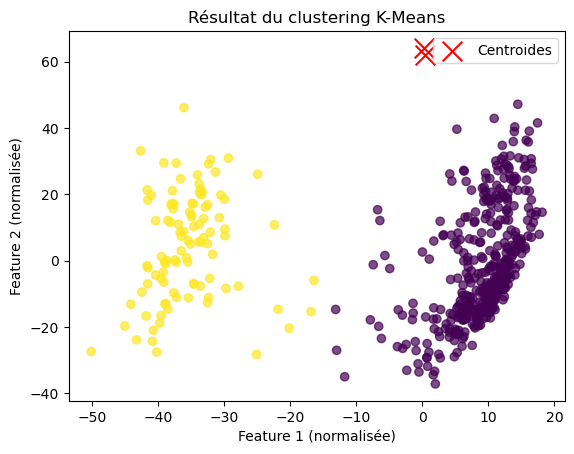

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label="Centroides")
plt.xlabel("Feature 1 (normalisée)")
plt.ylabel("Feature 2 (normalisée)")
plt.title("Résultat du clustering K-Means")
plt.legend()
plt.show()


In [8]:
#Evaluation

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

print(f"{silhouette_score(X_scaled, clusters)}")
print(f"{davies_bouldin_score(X_scaled, clusters)}")



0.36924148085779845
1.199308853558067


In [9]:
from kmodes.kprototypes import KPrototypes


In [10]:
data_cat = []
data_num = []
for i,col in enumerate(data_drop.columns):
    if data[col].mean() <= 1:
        data_cat.append(i)
    else:
        data_num.append(i) 

In [11]:
# Conversion du DataFrame en numpy array
X = data_drop.values

# Trouver les indices des colonnes catégorielles
categorical_columns_idx = data_cat.copy()  # 'Métier' et 'Ville' sont catégorielles


scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[:,data_num])
X_cat = X[:, categorical_columns_idx]

X_scaled = np.hstack((X_num_scaled, X_cat))

df_X_scaled = pd.DataFrame(X_scaled, columns=data_drop.columns)
df_X_scaled.head()

,GENRE,AGE,NB_AN_SCOL,IQ_CODE_J0,IQ_CODE_M6,IQ_CODE_M36,IQ_CODE_M60,PATHO_CORO,INSUF_CARD,ARTERIOPATHIE,...,ACT_PHYS,RIT_M6,MMSE_J7,MOCA_J7,MMSE_M6,MOCA_M6,MMSE_M36,MOCA_M36,MMSE_M60,MOCA_M60
0,-1.155317,-1.051394,-0.537712,-0.732171,-1.813541,0.465269,-0.609263,2.609775,1.871396,2.255772,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.763181,-0.788421,-0.543014,-0.565234,0.129080,-2.420913,-0.609263,2.186205,0.691193,-0.059589,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,-0.603953,-0.071960,2.783438,0.739340,-1.091010,-0.118183,0.932097,-0.767599,0.457388,-0.610423,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.553994,1.291213,-0.564113,0.309875,0.786166,0.259096,-0.609263,-1.082863,-0.181986,-0.633976,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.861605,-1.098024,-0.530599,-0.388684,0.383325,1.323022,-0.480922,-1.962609,-2.358409,-0.533655,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
# Initialiser K-Prototypes avec 3 clusters
kproto = KPrototypes(n_clusters=2, random_state=42, init='Huang')

# Ajuster le modèle
clusters = kproto.fit_predict(X_scaled, categorical=categorical_columns_idx)

# Ajouter les clusters au DataFrame
data['Cluster'] = clusters

# Affichage des résultats
print(data)


     GENRE        AGE  NB_AN_SCOL  IQ_CODE_J0  IQ_CODE_M6  IQ_CODE_M36  \
0      0.0  48.422889    8.101839   48.155668   47.809877    30.670447   
1      0.0  53.165332    9.231229   48.147459   48.094696    44.481254   
2      0.0  55.091005   12.308216   53.297305   50.320489    35.807191   
3      0.0  69.095067   18.162636   48.114794   49.587760    49.152721   
4      1.0  84.909150    7.901573   48.166680   48.395917    46.288776   
..     ...        ...         ...         ...         ...          ...   
495    0.0  69.347875   16.545289   48.137781   47.878977    46.699679   
496    1.0  56.074984   19.182172   50.939104   48.062841    46.065584   
497    0.0  57.186354   12.465680   48.138030   47.738347    47.122945   
498    0.0  57.282852   15.476061   47.920752   45.347181    23.176437   
499    1.0  82.662432   10.080256   48.426289   52.844609    43.470678   

     IQ_CODE_M60  PATHO_CORO  INSUF_CARD  ARTERIOPATHIE  ...    MOCA_M6  \
0      48.313821         0.0        

In [13]:
# Affichage des centroïdes des clusters
for i, centroid in enumerate(kproto.cluster_centroids_):
    print(f"Cluster {i}:")
    print(f" Numérique : {centroid[:len(X[0]) - len(categorical_columns_idx)]}")
    print(f" Catégorique : {centroid[len(X[0]) - len(categorical_columns_idx):]}")


Cluster 0:
 Numérique : [ 0.04917176 -0.05673181 -0.29948649  0.423561    0.39683194 -0.06808293
  0.06666667  0.01333333  0.00533333  0.08266667  0.          0.07466667
  0.528       0.11466667  0.47466667  0.14666667  0.23466667  0.13066667
  0.592     ]
 Catégorique : [-2.26959977 -1.96260935 -2.35840934 -1.87257137  0.59300613  0.7093273
 -4.76227286  1.07089059  1.35525156  0.91104916  1.05808343  0.66263991
  1.12764851  0.          0.          0.          0.          0.        ]
Cluster 1:
 Numérique : [-0.14751528  0.17019543  0.89845946 -1.27068301 -1.19049582  0.20424878
  0.032       0.016       0.008       0.168       0.          0.096
  0.56        0.104       0.416       0.192       0.456       0.12
  0.2       ]
 Catégorique : [ 2.03449035 -1.96260935 -2.34544345 -1.69188609 -2.14452748  0.7093273
 -4.76227286 -3.54635465 -3.46215104 -4.82315989 -3.35602464 -6.29102497
  1.12764851  0.          0.          0.          0.          0.        ]


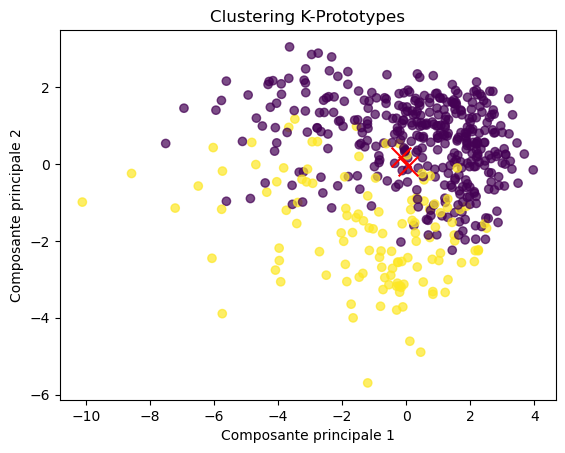

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Concaténation des données numériques et catégorielles encodées
X_final = X_scaled

# Réduction de dimension avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_final)

# Affichage des clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(kproto.cluster_centroids_[:, 0], kproto.cluster_centroids_[:, 1], c='red', marker='x', s=200, label="Centroides")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Clustering K-Prototypes")
plt.show()



In [15]:
import numpy as np
from fcmeans import FCM

In [16]:
fcm = FCM(n_clusters=2)
fcm.fit(X_scaled)

[0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0
 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0
 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1
 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1
 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0
 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0
 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 

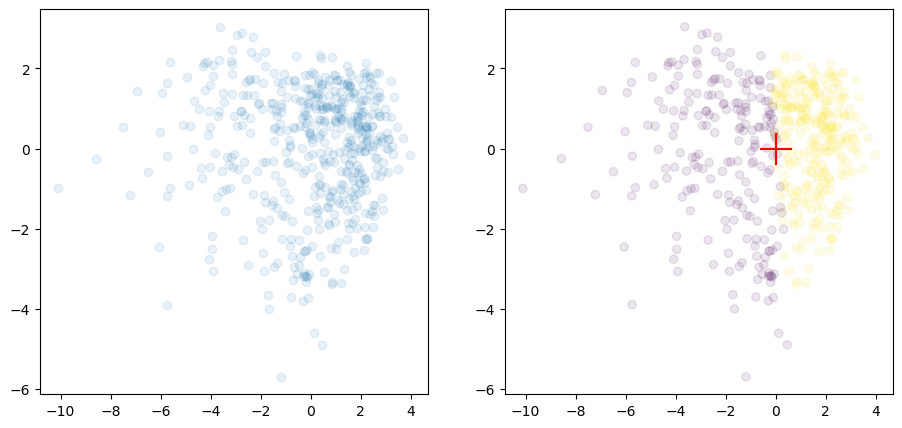

In [17]:
# outputs
fcm_centers = fcm.centers
fcm_labels_ = fcm.predict(X_scaled)

print(fcm_labels_)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X_pca[:,0], X_pca[:,1], alpha=.1)
axes[1].scatter(X_pca[:,0], X_pca[:,1], c=fcm_labels_, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='r')

plt.show()

In [18]:
n_clusters_list = [2, 3, 4, 5, 6, 7]
models = list()
for n_clusters in n_clusters_list:
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(X_scaled)
    models.append(fcm)

n_clusters = 2, PC = 0.250, PEC = 0.500
n_clusters = 3, PC = 0.111, PEC = 0.528
n_clusters = 4, PC = 0.063, PEC = 0.500
n_clusters = 5, PC = 0.040, PEC = 0.464
n_clusters = 6, PC = 0.028, PEC = 0.431
n_clusters = 7, PC = 0.020, PEC = 0.401


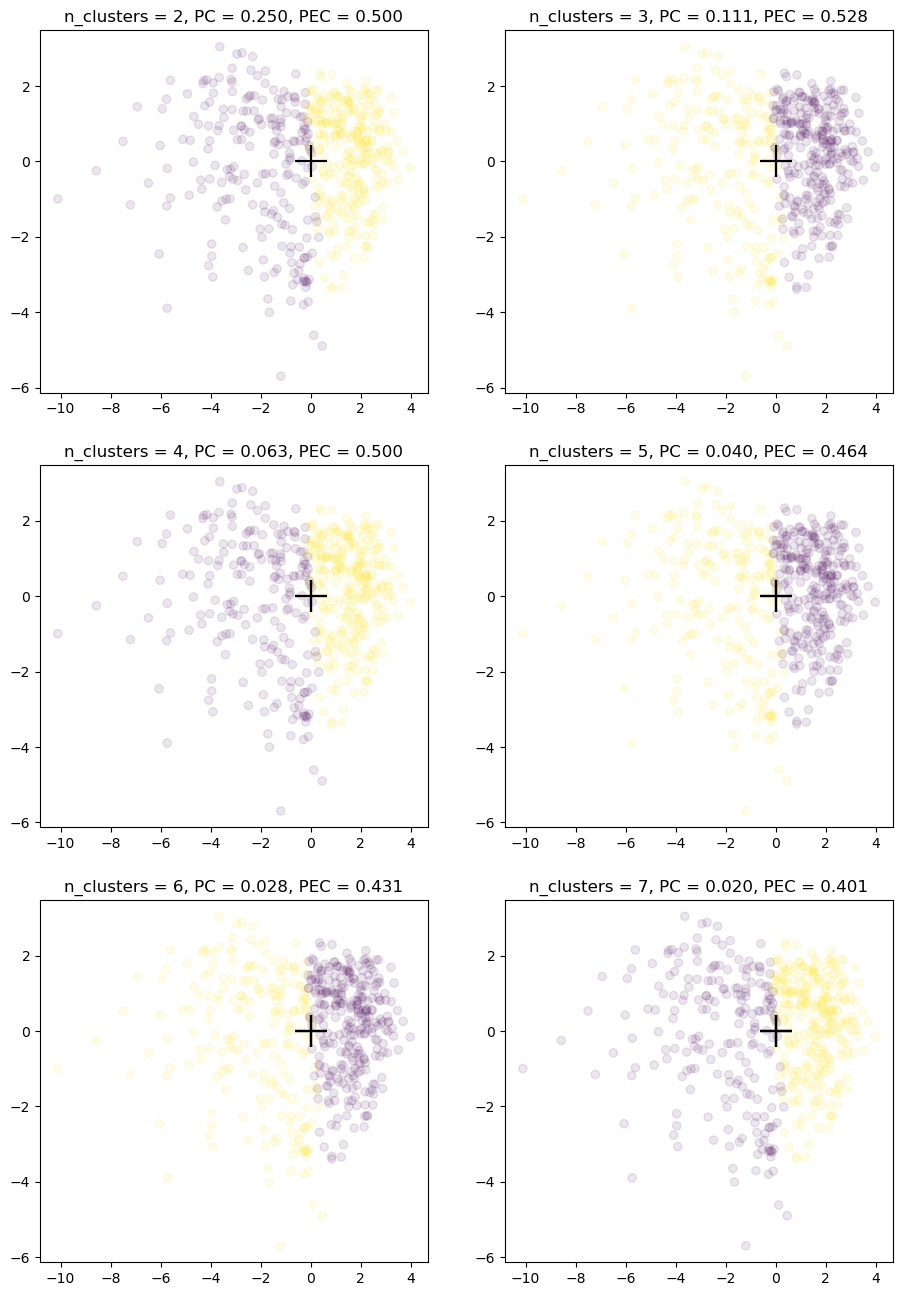

In [19]:
# outputs
num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(11,16))
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    # get validation metrics
    pc = model.partition_coefficient
    pec = model.partition_entropy_coefficient
    print(f"n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}")
    fcm_centers = model.centers
    fcm_labels = model.predict(X_scaled)
    # plot result
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    axe.scatter(X_pca[:,0], X_pca[:,1], c=fcm_labels, alpha=.1)
    axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')
    axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}')
plt.show()

[GPBoost] [Warning] Unknown parameter: pred_latent
[GPBoost] [Warning] Unknown parameter: pred_latent
[GPBoost] [Warning] Unknown parameter: pred_latent
[GPBoost] [Warning] Unknown parameter: pred_latent


C:\Users\gmrou\AppData\Local\Temp\ipykernel_27268\3832881584.py:51: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=pred_resp['response_mean'], cmap='viridis', alpha=0.7)


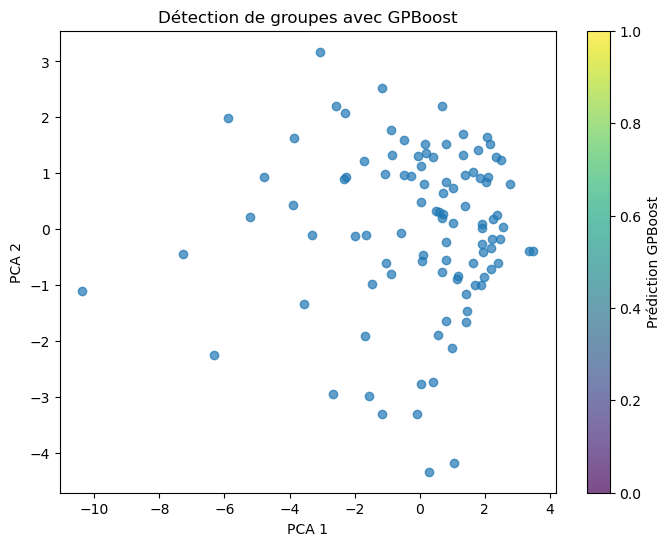

In [20]:
import numpy as np
import pandas as pd
import gpboost as gpb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 📌 1️⃣ Chargement des données (remplace par ton propre dataset)
df = df_X_scaled.copy()  # Remplace par ton fichier

# 📌 2️⃣ Sélection des features et de la cible
features = [col for col in df.columns if col != [outcome]]  # Remplace 'target' par ta colonne cible
X = df[features].values
y = data[outcome[0]].values  # Remplace 'target' par ta colonne cible

# 📌 3️⃣ Création des groupes (ex: une colonne catégorielle définissant des groupes)
group_ids = fcm_labels_  # Remplace 'group_id' par la colonne définissant les groupes

# 📌 4️⃣ Séparation Train/Test
X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(X, y, group_ids, test_size=0.2, random_state=42)

# 📌 5️⃣ Entraînement du modèle GPBoost
gp_model = gpb.GPModel(group_data=group_train)
params = {'learning_rate': 0.01, 'max_depth': 3, 
          'num_leaves': 2**10, 'verbose': 0}
train_set = gpb.Dataset(X_train, label=y_train)

bst = gpb.train(params=params, train_set=train_set, gp_model=gp_model, num_boost_round=100)

# 📌 5️⃣ Vérification de `group_test`
if len(group_test) == 0:
    raise ValueError("Erreur : `group_test` est vide. Vérifie tes données.")

# 📌 6️⃣ Prédiction avec gestion des groupes
m = len(X_test)
group_test_new = -np.ones(m)  # Pour prédictions sur nouveaux groupes
Xtest = np.zeros((m, X_test.shape[1]))  # Dimensions adaptées
Xtest[:, 0] = np.linspace(0, 1, m)  # Exemple de variation

# Prédiction des effets latents
pred = bst.predict(data=X_test, group_data_pred=group_test, predict_var=True, pred_latent=True)

# Prédiction de la variable réponse
pred_resp = bst.predict(data=X_test, group_data_pred=group_test_new, predict_var=True, pred_latent=False)

# 📌 7️⃣ Visualisation avec PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=pred_resp['response_mean'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Prédiction GPBoost")
plt.title("Détection de groupes avec GPBoost")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()




c:\Users\gmrou\.conda\envs\cluster\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[[1.00000000e+000 4.06615643e-029]
 [5.09948768e-003 9.94900512e-001]
 [6.32856730e-002 9.36714327e-001]
 [1.00000000e+000 9.57127831e-025]
 [1.00000000e+000 1.17201487e-084]
 [1.00000000e+000 1.28117852e-025]
 [1.31834671e-003 9.98681653e-001]
 [1.00000000e+000 2.97614893e-064]
 [9.31569090e-006 9.99990684e-001]
 [1.00000000e+000 4.08185314e-199]
 [3.24864351e-006 9.99996751e-001]
 [4.30415772e-038 1.00000000e+000]
 [9.99999997e-001 2.63263955e-009]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 3.66907398e-051]
 [1.00000000e+000 4.01114586e-027]
 [1.03958290e-003 9.98960417e-001]
 [1.00000000e+000 1.09406140e-017]
 [1.00000000e+000 1.57709110e-029]
 [1.00000000e+000 3.60239129e-031]
 [0.00000000e+000 1.00000000e+000]
 [1.74702101e-002 9.82529790e-001]
 [1.00000000e+000 5.88224199e-192]
 [1.00000000e+000 4.95934311e-016]
 [1.00000000e+000 2.36676787e-011]
 [1.00000000e+000 5.02130470e-112]
 [1.00000000e+000 8.19412928e-039]
 [1.84380546e-002 9.81561945e-001]
 [1.57301246e-002 9.

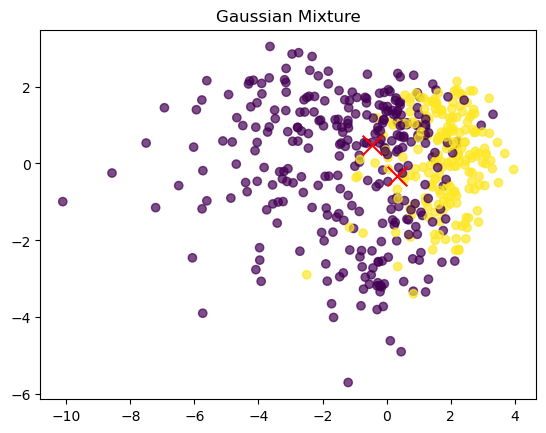

In [21]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=0).fit(X_scaled)

gm_labels = gm.predict(X_scaled)
gm_density = gm.predict_proba(X_scaled)
print(gm_density)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.scatter(X_pca[:,0], X_pca[:,1], c=gm_labels, cmap='viridis', alpha=0.7)
plt.scatter(gm.means_[:,0], gm.means_[:,1], c='red', marker='x', s=200, label="Centroides")
plt.title("Gaussian Mixture")
plt.show()    


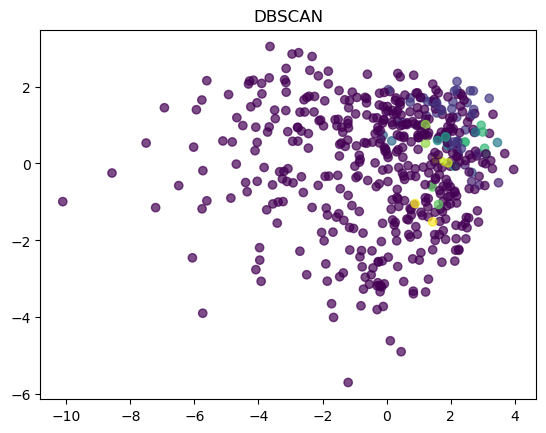

In [22]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=2, min_samples=2).fit(X_scaled)
clustering.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clustering.labels_, cmap='viridis', alpha=0.7)
plt.title("DBSCAN")
plt.show()


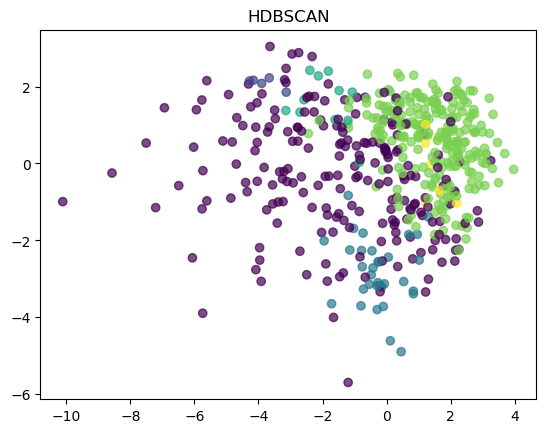

In [23]:
from sklearn.cluster import HDBSCAN

clusterer = HDBSCAN(min_cluster_size=5, min_samples=2)

clusterer.fit(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusterer.labels_, cmap='viridis', alpha=0.7)
plt.title("HDBSCAN")
plt.show()

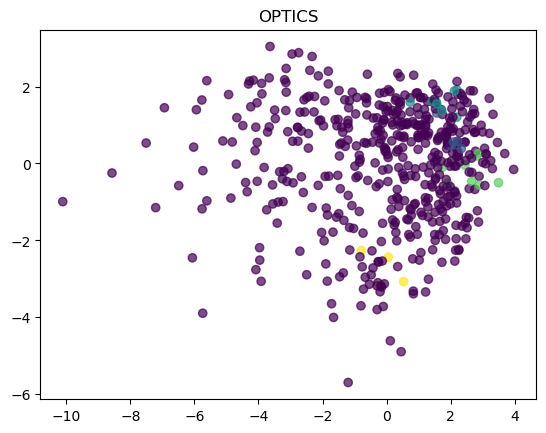

In [24]:
from sklearn.cluster import OPTICS
clustering = OPTICS(min_samples=4).fit(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clustering.labels_, cmap='viridis', alpha=0.7)
plt.title("OPTICS")
plt.show()

c:\Users\gmrou\.conda\envs\cluster\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


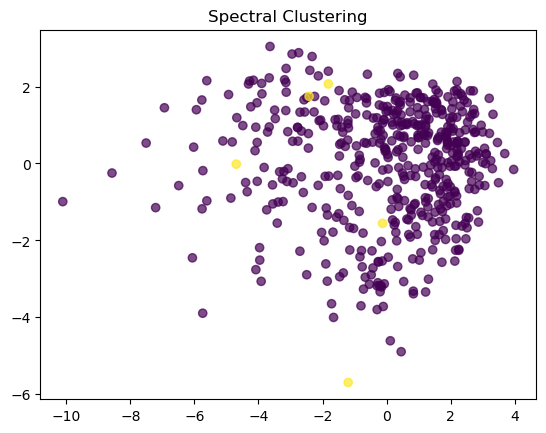

In [25]:
from sklearn.cluster import SpectralClustering

clustering= SpectralClustering(n_clusters=2).fit(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clustering.labels_, cmap='viridis', alpha=0.7)
plt.title("Spectral Clustering")
plt.show()




In [26]:
from minisom import MiniSom
import numpy as np
import pandas as pd


print(X_scaled.shape)
# Initialization and training
som_shape = (2,2)
som = MiniSom(2,2,37 , sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(X_scaled, 500, verbose=True)

(500, 37)
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 3.9384771622347436


In [27]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in X_scaled]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

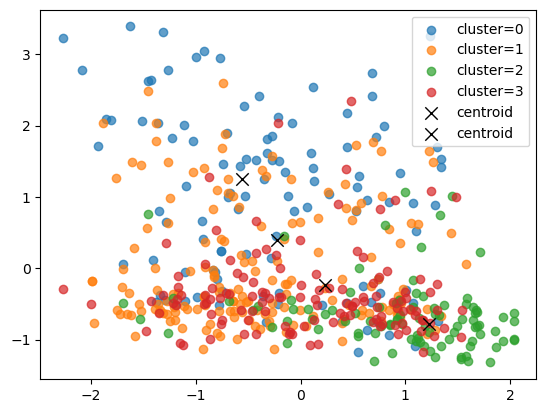

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(X_scaled[cluster_index == c, 0],
                X_scaled[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=1, color='k', label='centroid')
plt.legend()

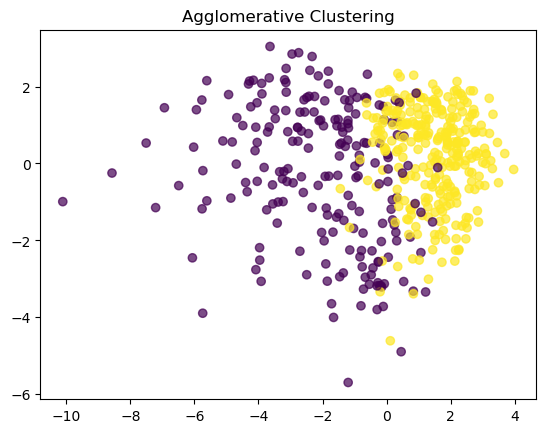

In [29]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2).fit(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clustering.labels_, cmap='viridis', alpha=0.7)
plt.title("Agglomerative Clustering")
plt.show()

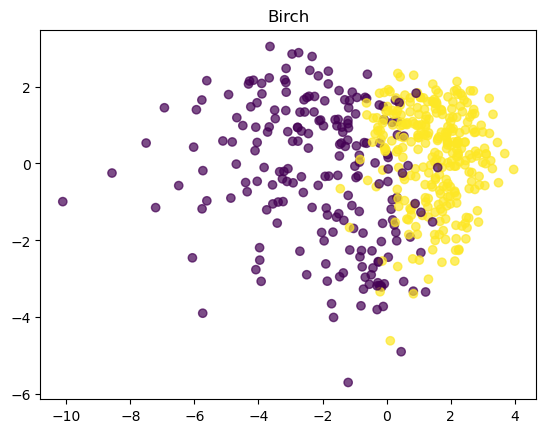

In [30]:
from sklearn.cluster import Birch

brc = Birch(n_clusters=2)

brc.fit(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=brc.labels_, cmap='viridis', alpha=0.7)
plt.title("Birch")
plt.show()
